In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 23.4MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 1.4394 - accuracy: 0.5803 - val_loss: 0.6390 - val_accuracy: 0.6438
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5890 - accuracy: 0.6956 - val_loss: 1.3177 - val_accuracy: 0.5262
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4976 - accuracy: 0.7592 - val_loss: 0.5173 - val_accuracy: 0.7484
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4289 - accuracy: 0.8044 - val_loss: 1.3282 - val_accuracy: 0.6252
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3692 - accuracy: 0.8362 - val_loss: 0.5580 - val_accuracy: 0.7422
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3002 - accuracy: 0.8731 - val_loss: 0.4489 - val_accuracy: 0.8036
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.2280 - accuracy: 0.9061 - val_loss: 0.4822 - val_ac

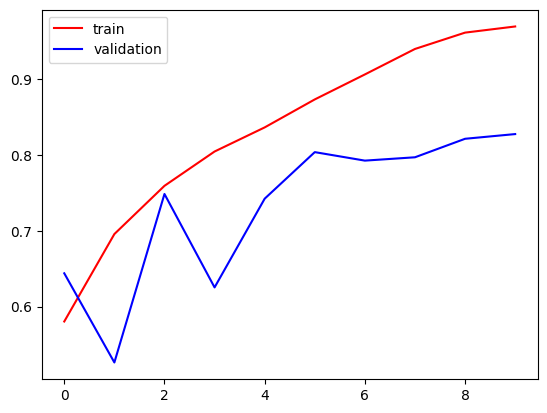

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

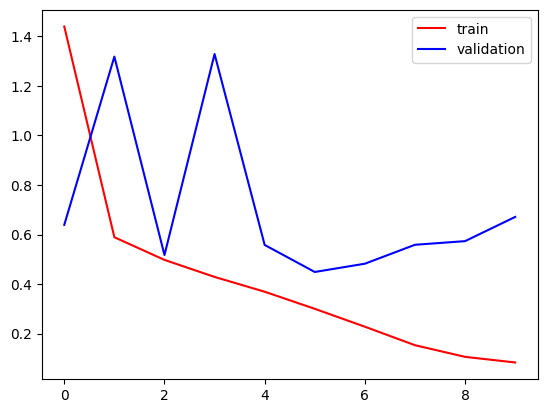

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [82]:
import cv2

In [83]:
model.save('pathmodel.h5')

Enter the file path:/content/cat1.jpeg
1/1 [==============================] - 0s 110ms/step
Exact Probabilities:
[[1.1956532e-21]]
Binary Class Labels:
[[0]]
The image is predicted to be a Cat.


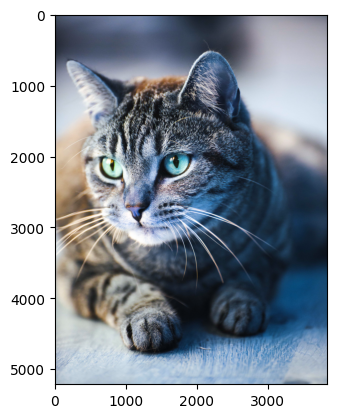

In [90]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('pathmodel.h5')

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = input('Enter the file path:')
test_img = cv2.imread(img_path)
plt.imshow(test_img)

input_image = preprocess_image(img_path, target_size=(256, 256))

predictions = model.predict(input_image)
print("Exact Probabilities:")
print(predictions)

class_labels = (predictions > 0.5).astype(int)
print("Binary Class Labels:")
print(class_labels)

if class_labels[0][0] == 0:
    print("The image is predicted to be a Cat.")
else:
    print("The image is predicted to be a Dog.")

Enter the file path:/content/dog1.jpeg
1/1 [==============================] - 0s 99ms/step
Exact Probabilities:
[[0.99999833]]
Binary Class Labels:
[[1]]
The image is predicted to be a Dog.


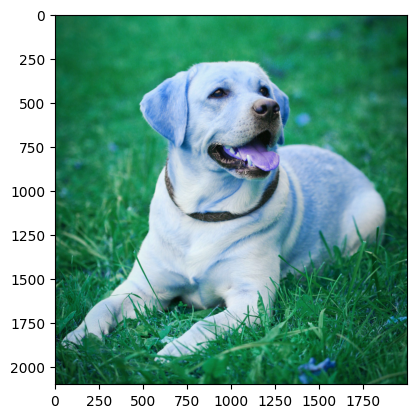

In [91]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('pathmodel.h5')

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = input('Enter the file path:')
test_img = cv2.imread(img_path)
plt.imshow(test_img)

input_image = preprocess_image(img_path, target_size=(256, 256))

predictions = model.predict(input_image)
print("Exact Probabilities:")
print(predictions)

class_labels = (predictions > 0.5).astype(int)
print("Binary Class Labels:")
print(class_labels)

if class_labels[0][0] == 0:
    print("The image is predicted to be a Cat.")
else:
    print("The image is predicted to be a Dog.")